In [1]:
# import das bibliotecas necessarias:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# path referente aa localizacao do modulo:
sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules')

In [3]:
# Import da biblioteca externa:
from plots import plots_rectangles

## Tarefa : 
> Plotar prismas de acordo com os dados fornecidos que são o número de observações e as dimensões referentes aos prismas. Neste caso, estamos considerando prismas de mesmas dimensões. Posteriormente, iremos diferenciar os prismas entre si.

In [4]:
# Coletando os limites em x e z do levantamento sintético:
print("Qual o número de observações?")
nobs = int( input() )
print("Qual o limite mínimo em z do levantamento sintético?")
zmin = float( input() )
print("Qual o limite máximo em z do levantamento sintético?")
zmax = float( input() )
print("Qual o limite mínimo em x do levantamento sintético?")
xmin = float( input() )
print("Qual o limite máximo em x do levantamento sintético?")
xmax = float( input() )

Qual o número de observações?
10
Qual o limite mínimo em z do levantamento sintético?
0
Qual o limite máximo em z do levantamento sintético?
10
Qual o limite mínimo em x do levantamento sintético?
0
Qual o limite máximo em x do levantamento sintético?
100


In [5]:
# definindo as coordenadas sinteticas do levantamento:
x = np.linspace(xmin, xmax, nobs, endpoint=True)
#z = np.linspace(zmin, zmin, nobs, endpoint=True)
z = np.zeros( len(x) )
for i in range( len(x) ):
    z[i] = random.uniform(0.0, -10.0)  



print(x[0]-x[1])

-11.11111111111111


In [6]:
# localizacao do primeiro prisma em funcao da posicao de observacao (1 prisma por observacao):
xmed = ( x[0] + x[1] ) / 2.0
x_prisma = x[0] - ( xmed )
print (x_prisma)

-5.555555555555555


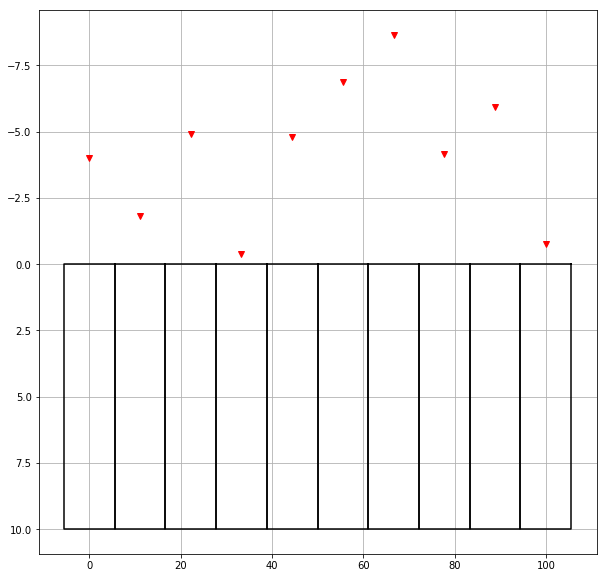

In [7]:
# Visualização gráfica:
plt.figure( figsize=(10,10) )
plt.plot(x,z,'vr')

for i in range (nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
#plt.ylim(zmin, zmax + 10)
plt.gca().invert_yaxis()
plt.show()

## Teste da funcao plots_rectangles:


In [8]:
# definicao das profundidades de cada prisma (a posteriori, sera o resultado obtido)
p = np.linspace(2.0, 20.0, len(x), endpoint=True )


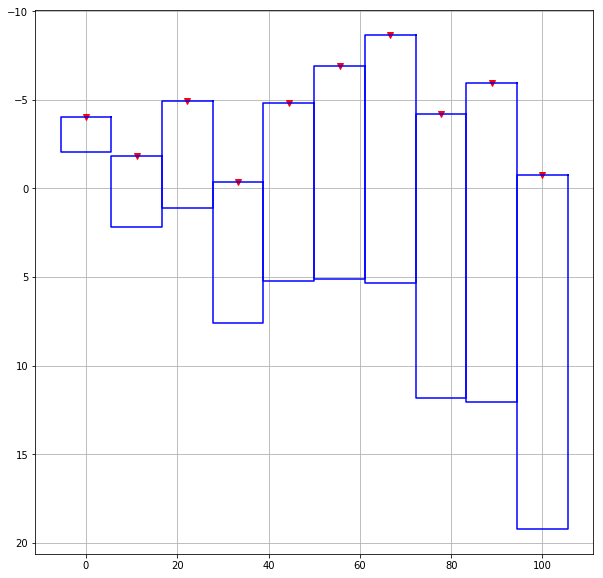

In [9]:
plots_rectangles(x,z,p,color='blue')

# TODO:<br>
> ajustar o negocio ai (grafico) para observacoes que simulam um relevo (zo variavel) <br>
> preencher cada retangulo com cores, onde cada cor representa um contraste de densidade ($g/cm^3$)